<font color = 'Blue'><h1> GRIP: The Sparks Foundation </h1></font>

<font size= 3 ><b> Data Science and Business Analytics Internship </b></font>

<font size=3><b> Task 2: Prediction using Unsupervised ML </b></font>

<font size=3><b> Submitted By: Tirthankar Chakraborty </b></font>

<font color= 'Blue'><h3><b> Task Description:  In this task we have to predict the optimum number of clusters 
    from the given \
    ‘Iris' dataset and represent it visually. </b></h3></font>

<font color='Blue'><b><li> Importing Necessary Libraries. </li></b></font>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
print("Libraries imported successfully!")

Libraries imported successfully!


<font color='Blue'><b><li> Loading the Dataset. </li></b></font>

In [59]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
print("Data loaded Successfully!")

Data loaded Successfully!


<font color='Blue'><b><li> Exploring Data.</li></b></font>

In [60]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<h3><font color='grey'><b>This is evident that there is no null value, hence we do not need to handle missing values.</b></font></h3>

<font color='Blue'><b><li>Finding the optimum number of clusters for k-means classification with 'The Elbow Method'.</li></b></font>

In [62]:
X=iris_data.iloc[:,:].values
sse=[]
for k in range(1,10):
    km=KMeans(n_clusters=k, random_state=45)
    km.fit(X)
    sse.append(km.inertia_)
print('Fitting Done!')

Fitting Done!


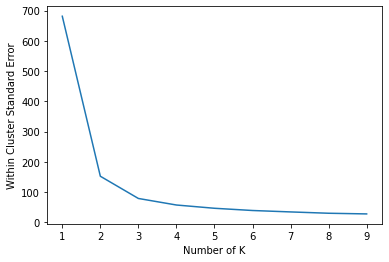

In [63]:
plt.plot(range(1,10),sse)
plt.xlabel('Number of K')
plt.ylabel('Within Cluster Standard Error')
plt.show()

<font color='grey'><h3>The Elbow is at 3.</h3></font>

<li><b><font color='Blue'>Creating K-Means Classifier.</font></b></li>

In [64]:
km=KMeans(n_clusters=3,random_state=45)
y_pred=km.fit_predict(X)

In [65]:
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [66]:
df_1=iris_data[y_pred==0]
df_2=iris_data[y_pred==1]
df_3=iris_data[y_pred==2]

In [67]:
df_1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
52,6.9,3.1,4.9,1.5
77,6.7,3.0,5.0,1.7
100,6.3,3.3,6.0,2.5
102,7.1,3.0,5.9,2.1
103,6.3,2.9,5.6,1.8


<font color='Blue'><li><b>Visualizing Clusters.</b></li></font>

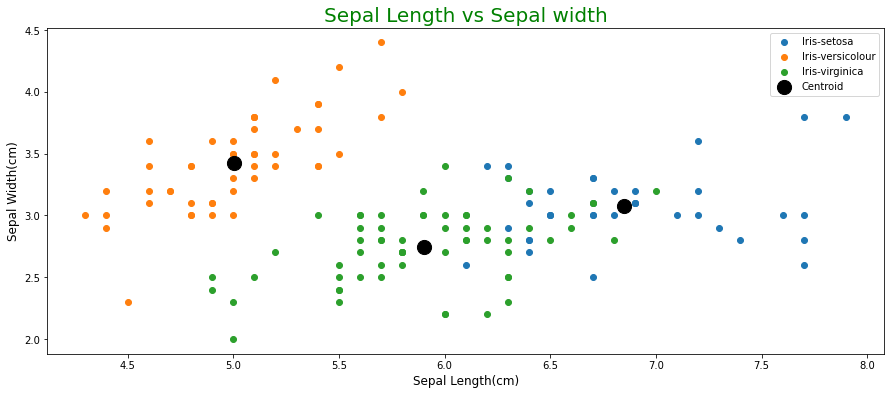

In [68]:
#Plotting Clusters with respect to Sepal Length and Width

plt.figure(figsize=(15,6))
plt.scatter(x=df_1['sepal length (cm)'],y=df_1['sepal width (cm)'], label='Iris-setosa')
plt.scatter(x=df_2['sepal length (cm)'],y=df_2['sepal width (cm)'], label='Iris-versicolour')
plt.scatter(x=df_3['sepal length (cm)'],y=df_3['sepal width (cm)'], label='Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=200, label='Centroid', c='black')
plt.title("Sepal Length vs Sepal width", fontsize=20,c='green')
plt.xlabel('Sepal Length(cm)',fontsize=12)
plt.ylabel('Sepal Width(cm)', fontsize=12)
plt.legend()
plt.show()

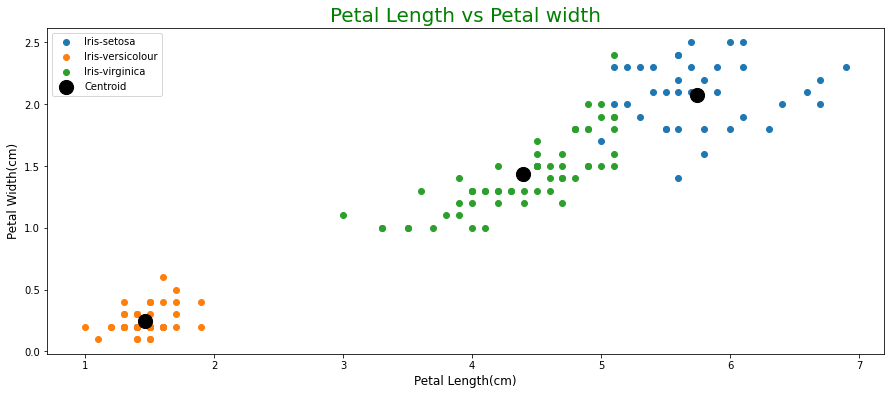

In [69]:
#Plotting Clusters with respect to Petal Length and Width

plt.figure(figsize=(15,6))
plt.scatter(x=df_1['petal length (cm)'],y=df_1['petal width (cm)'], label='Iris-setosa')
plt.scatter(x=df_2['petal length (cm)'],y=df_2['petal width (cm)'], label='Iris-versicolour')
plt.scatter(x=df_3['petal length (cm)'],y=df_3['petal width (cm)'], label='Iris-virginica')
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3], s=200, label='Centroid', c='black')
plt.title("Petal Length vs Petal width", fontsize=20,c='green')
plt.xlabel('Petal Length(cm)',fontsize=12)
plt.ylabel('Petal Width(cm)', fontsize=12)
plt.legend()
plt.show()

<font color='Blue'><li><b><h3>Forming clusters of flowers using Sepal Length and Width features.</h3></b></li></font>

In [70]:
#Elbow Method

from sklearn.cluster import KMeans
sse = []      # Within cluster sum of squares

x = iris_data.iloc[:, [0,1]].values

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i )
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
print("Fitting Done!")

Fitting Done!


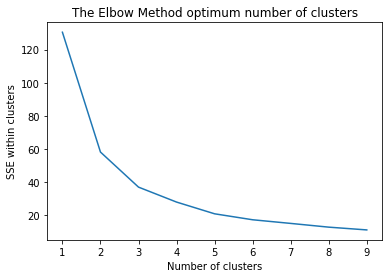

In [71]:
#Plotting the results onto a line graph to observe 'The elbow'

plt.plot(range(1,10),sse)
plt.title('The Elbow Method optimum number of clusters')
plt.xlabel("Number of clusters")
plt.ylabel("SSE within clusters")
plt.show()

<font color='grey'><h3>The Elbow is at 3.</h3></font>

In [72]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3)
y_pred2 = kmeans.fit_predict(x)

In [73]:
#Co-ordinates of the Centroids

kmeans.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]])

In [74]:
#Creating dataframes based upon predicted labels

df1=iris_data[y_pred2==0]
df2=iris_data[y_pred2==1]
df3=iris_data[y_pred2==2]

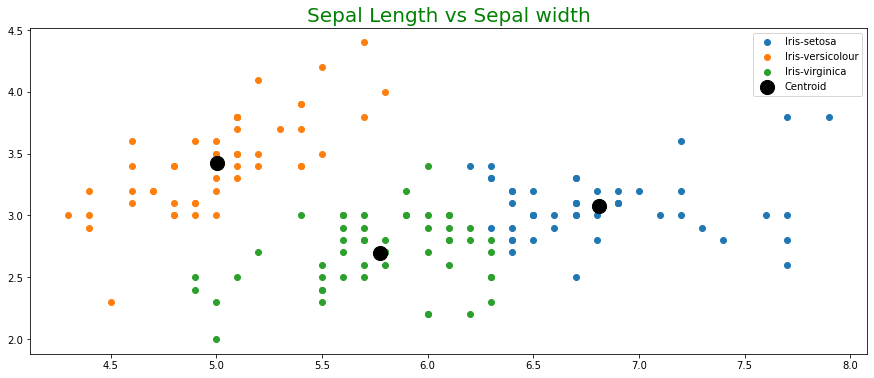

In [75]:
#Plotting Clusters

plt.figure(figsize=(15,6))
plt.scatter(x=df1['sepal length (cm)'],y=df1['sepal width (cm)'], label='Iris-setosa')
plt.scatter(x=df2['sepal length (cm)'],y=df2['sepal width (cm)'], label='Iris-versicolour')
plt.scatter(x=df3['sepal length (cm)'],y=df3['sepal width (cm)'], label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200, label='Centroid', c='black')
plt.title("Sepal Length vs Sepal width",c='green',fontsize=20)
plt.legend()
plt.show()


<font color='Blue'><li><b><h3>Forming clusters of flowers using Petal Length and Width features.</h3></b></li></font>

In [76]:
#Elbow Method to find the number of optimal Clusters, i.e. Finding the K of K-Means

from sklearn.cluster import KMeans
sse = []      # Within cluster sum of squares

x = iris_data.iloc[:, [2,3]].values

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i,init = 'k-means++' )
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
print("Fitting Done!")

Fitting Done!


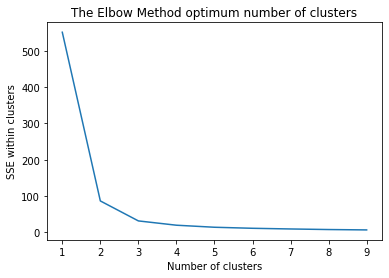

In [77]:
#Plotting the results onto a line graph to observe 'The elbow'

plt.plot(range(1,10),sse)
plt.title('The Elbow Method optimum number of clusters')
plt.xlabel("Number of clusters")
plt.ylabel("SSE within clusters")
plt.show()

<font color='grey'><h3>Elbow at 3</h3></font>

In [78]:
#Creating K means Classifiers

kmeans=KMeans(n_clusters=3)
y_pred3=kmeans.fit_predict(x)

In [79]:
#Co-ordinates of the Centroids

kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [80]:
#Creating dataframes based upon predicted labels

df1=iris_data[y_pred3==0]
df2=iris_data[y_pred3==1]
df3=iris_data[y_pred3==2]

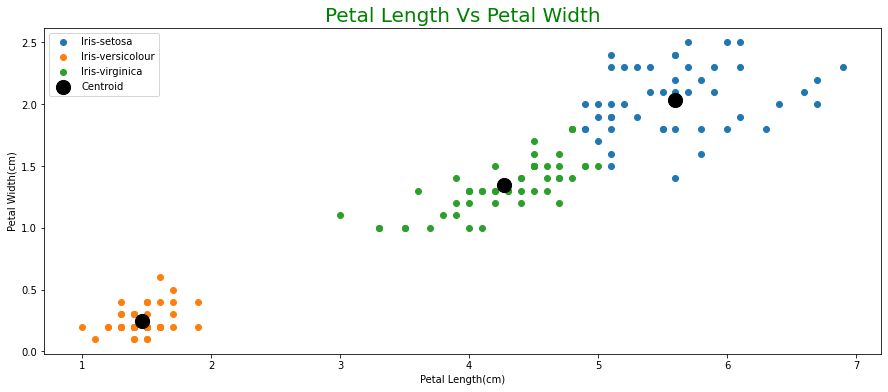

In [81]:
#Plotting Clusters

plt.figure(figsize=(15,6))
plt.scatter(x=df1['petal length (cm)'],y=df1['petal width (cm)'], label='Iris-setosa')
plt.scatter(x=df2['petal length (cm)'],y=df2['petal width (cm)'], label='Iris-versicolour')
plt.scatter(x=df3['petal length (cm)'],y=df3['petal width (cm)'], label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200, label='Centroid',c='black')

plt.title('Petal Length Vs Petal Width',c='green',fontsize=20) 
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')
plt.legend()
plt.show()

<h1><font color='Blue'>Thank You!</font></h1>